In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [3]:
from pathlib import Path
import sys
import yaml
sys.path.append("../../")

In [4]:
from pytorch_toolbox.pipeline import PipelineGraph
from src.train_with_template import lookups

In [5]:
CONFIG_FILE = Path("../configs/se_resnext50_32x4d_two_input_fc_template.yml")

In [6]:
with CONFIG_FILE.open("r") as f:
    config = yaml.load(f)

In [7]:
pipeline_graph = PipelineGraph.create_pipeline_graph_from_config(config)

In [8]:
pipeline_graph.sorted_node_names

['LoadTrainingData',
 'CreateDataSplitter',
 'LoadTestingData',
 'CreateDenormalizeFunction',
 'CreateNormalizeFunction',
 'CreateTestAugmentationFunction',
 'CreateAugmentationFunction',
 'CreateOpenImageFunction',
 'CreateTestingDataset',
 'CreateValidationDataset',
 'CreateTrainingDataset',
 'CreateFocalLoss',
 'CreateF1SoftMetric',
 'CreateAccuracyMetric',
 'CreateModel',
 'CreateGradientClippingLearnerCallback',
 'CreateNameExtractionCallback',
 'CreateCallbacks',
 'CreateTimeStampedSavePath',
 'CreateOutputRecorderLearnerCallback',
 'CreateCSVLoggerLearnerCallback',
 'CreateLearnerCallbacks',
 'CreateLearner',
 'SaveConfiguration',
 'CreateResultRecorder',
 'RunRecordResults',
 'CreateTrainingScheme',
 'CreateSamplerFunction',
 'CreateSampler',
 'CreateDataBunch',
 'RunTrainingLoop']

In [9]:
pipeline_graph.run(lookups, to_node="CreateDataBunch")

In [10]:
create_data_splitter = pipeline_graph.get_node("CreateDataSplitter")
create_data_bunch = pipeline_graph.get_node("CreateDataBunch")
create_learner = pipeline_graph.get_node("CreateLearner")

In [11]:
train_idx, val_idx = next(iter(create_data_splitter['output_lookup']['DataSplitter']()))

In [12]:
data_bunch = create_data_bunch['output_lookup']['DataBunch'](train_idx, val_idx)

Weighted sampled proportions:
[(0, 0.25773398155617083),
 (1, 0.024155747890732302),
 (2, 0.07013451350585363),
 (3, 0.03115393838976215),
 (4, 0.03520896466022804),
 (5, 0.05116745514399704),
 (6, 0.019206871743443283),
 (7, 0.05491726438335259),
 (8, 0.001220868124441344),
 (9, 0.0008938498768231267),
 (10, 0.0004796267631733851),
 (11, 0.021103577579628944),
 (12, 0.013625760317425713),
 (13, 0.010682596088861759),
 (14, 0.021125378796136823),
 (15, 0.0004578255466655039),
 (16, 0.009810547428546514),
 (17, 0.004425646951099872),
 (18, 0.01822581700058863),
 (19, 0.02984586539928928),
 (20, 0.0036408031568161505),
 (21, 0.07347009963155944),
 (22, 0.014781224792343412),
 (23, 0.05818744685953476),
 (24, 0.006017135756175194),
 (25, 0.1613726045913362),
 (26, 0.006758377117443154),
 (27, 0.00019621094857093027)]


In [13]:
data_bunch

DataBunch;
Train: <src.data.ProteinClassificationDataset object at 0x7f97a3bbcef0>;
Valid: <src.data.ProteinClassificationDataset object at 0x7f97a3bbcd68>;
Test: <src.data.ProteinClassificationDataset object at 0x7f97a3bbcc50>

In [14]:
x, y = next(iter(data_bunch.test_dl))

In [15]:
learner = create_learner['output_lookup']['LearnerCreator'](data_bunch)

In [16]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


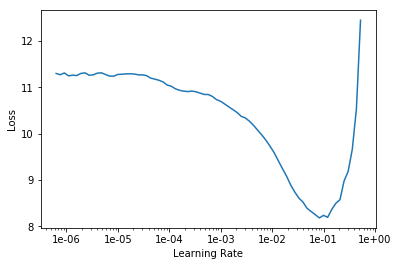

In [17]:
learner.recorder.plot()

In [18]:
learner.lr_find(num_it=250)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


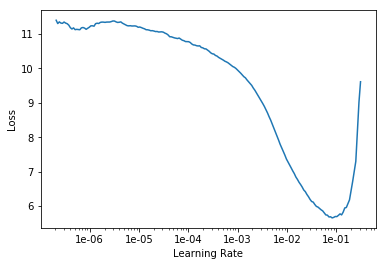

In [19]:
learner.recorder.plot()

In [20]:
learner.lr_find(num_it=250)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


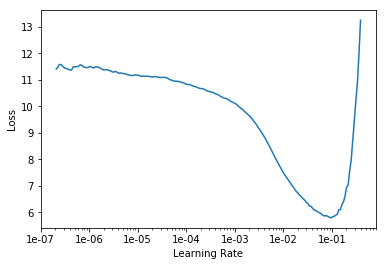

In [21]:
learner.recorder.plot()